In [3]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Augmenting Dataset

In [ ]:
DATASET_PATH = "../dataset"
OUTPUT_PATH = "../data/processed"
CACHE_FILE = "../data/processed/preprocessed_uniform.npz"  # Uniform 30% augmentation

from pathlib import Path
from data_preprocessing import (
    load_dataset, 
    augment_dataset, 
    save_preprocessed_data,
    load_preprocessed_data
)

try:
    # Check if cached preprocessed data exists
    cache_path = Path(CACHE_FILE)
    
    if cache_path.exists():
        print("📦 Found cached preprocessed data - loading from cache...")
        augmented_images, augmented_labels = load_preprocessed_data(CACHE_FILE)
        
        print("\n✓ Using cached data - MUCH FASTER than loading from folders!")
        
    else:
        print("🔄 No cache found - loading from folders and preprocessing...")
        print("💡 UNIFORM AUGMENTATION: 30% increase per class")
        
        # Load original dataset
        images, labels, class_names = load_dataset(DATASET_PATH)
        
        # Augment dataset with UNIFORM distribution
        # 30% increase per class (uniform)
        augmented_images, augmented_labels = augment_dataset(
            images, labels, 
            augmentation_factor=0.3,  # 30% per class
            balance_classes=True     # Uniform distribution
        )
        
        # Save to cache for next time
        print("\n💾 Saving preprocessed data to cache for future runs...")
        save_preprocessed_data(augmented_images, augmented_labels, OUTPUT_PATH, 'preprocessed_uniform.npz')
        print("✓ Preprocessed data saved to cache!")
    
    # Display results
    print("\n" + "="*60)
    print("FINAL RESULTS (UNIFORM 30%):")
    print("="*60)
    print(f"Dataset shape: {augmented_images.shape}")
    print(f"Labels shape: {augmented_labels.shape}")
    print(f"Total images: {len(augmented_images)}")
    
    print("\n📊 Uniform class distribution:")
    unique, counts = np.unique(augmented_labels, return_counts=True)
    class_names_dict = {0: 'glass', 1: 'paper', 2: 'cardboard', 3: 'plastic', 4: 'metal', 5: 'trash'}
    total = len(augmented_images)
    for class_id, count in zip(unique, counts):
        pct = (count / total * 100)
        print(f"  {class_names_dict[class_id]}: {count} images ({pct:.1f}%)")
    
    print("\n✅ Uniform augmentation (30% per class):")
    print("   • Each class increased by 30%")
    print("   • Maintains original distribution")
    print("   • No risk of overfitting to augmented minority samples")
    
    print("\n" + "="*60)
    print("✓ Data ready for feature extraction!")
    print("="*60)
    
except Exception as e:
    print(f"\n❌ Error: {e}")
    import traceback
    traceback.print_exc()

🔄 No cache found - loading from folders and preprocessing...
💡 UNIFORM AUGMENTATION: 30% increase per class
Loading dataset from: f:\COURSES\ML\Project\notebooks\..\dataset
Loading 385 images from 'glass' (ID: 0)


Loading glass: 100%|██████████| 385/385 [00:00<00:00, 1438.06it/s]


Loading 449 images from 'paper' (ID: 1)


Loading paper: 100%|██████████| 449/449 [00:00<00:00, 1262.57it/s]


Loading 247 images from 'cardboard' (ID: 2)


Loading cardboard: 100%|██████████| 247/247 [00:00<00:00, 1327.99it/s]


Loading 363 images from 'plastic' (ID: 3)


Loading plastic: 100%|██████████| 363/363 [00:00<00:00, 1415.14it/s]


Loading 315 images from 'metal' (ID: 4)


Loading metal: 100%|██████████| 315/315 [00:00<00:00, 1241.20it/s]


Loading 106 images from 'trash' (ID: 5)


Loading trash: 100%|██████████| 106/106 [00:00<00:00, 1402.63it/s]



Dataset loaded successfully!
Total images: 1865
Image shape: (224, 224, 3)
Data Columns Names: N/A

Class distribution:
  0 (glass): 385 images
  1 (paper): 449 images
  2 (cardboard): 247 images
  3 (plastic): 363 images
  4 (metal): 315 images
  5 (trash): 106 images
  6 (unknown): 0 images

STARTING DATA AUGMENTATION

Original dataset size: 1865

Original class distribution:
  glass: 385 images (20.6%)
  paper: 449 images (24.1%)
  cardboard: 247 images (13.2%)
  plastic: 363 images (19.5%)
  metal: 315 images (16.9%)
  trash: 106 images (5.7%)

🎯 BALANCING CLASSES: Target size = 449 (largest class)
Total new samples to generate: 829

Augmenting classes...
  glass: 385 → 449 (+64, +17%) = 16.7% of total


  paper: no augmentation
  cardboard: 247 → 449 (+202, +82%) = 16.7% of total


  plastic: 363 → 449 (+86, +24%) = 16.7% of total


  metal: 315 → 449 (+134, +43%) = 16.7% of total


  trash: 106 → 449 (+343, +324%) = 16.7% of total



AUGMENTATION COMPLETE
Final dataset size: 2694
Increase: 829 images
Actual increase: 44.5%

Augmented class distribution:
  glass: 385 → 449 (+64)
  paper: 449 → 449 (+0)
  cardboard: 247 → 449 (+202)
  plastic: 363 → 449 (+86)
  metal: 315 → 449 (+134)
  trash: 106 → 449 (+343)

💾 Saving preprocessed data to cache for future runs...

SAVING PREPROCESSED DATA
Images shape: (2694, 224, 224, 3)
Labels shape: (2694,)
Saving to: ..\data\processed\preprocessed_uniform.npz
✓ Saved successfully!
✓ File size: 164.87 MB
✓ Preprocessed data saved to cache!

FINAL RESULTS (UNIFORM 30%):
Dataset shape: (2694, 224, 224, 3)
Labels shape: (2694,)
Total images: 2694

📊 Uniform class distribution:
  glass: 449 images (16.7%)
  paper: 449 images (16.7%)
  cardboard: 449 images (16.7%)
  plastic: 449 images (16.7%)
  metal: 449 images (16.7%)
  trash: 449 images (16.7%)

✅ Uniform augmentation (30% per class):
   • Each class increased by 30%
   • Maintains original distribution
   • No risk of overfitt

## Feature Extraction

In [6]:
# Import the function for batch feature extraction
from feature_extraction import extract_features_from_dataset

# Extract features from entire augmented dataset using CNN
print("\n" + "="*60)
print("EXTRACTING FEATURES FROM ENTIRE DATASET - CNN METHOD")
print("="*60)
print(f"Total images to process: {len(augmented_images)}")

all_features = extract_features_from_dataset(augmented_images, method='cnn')

print(f"\nFeature extraction complete!")
print(f"Final feature matrix shape: {all_features.shape}")
print(f"  - Samples: {all_features.shape[0]}")
print(f"  - Features per sample: {all_features.shape[1]}")


EXTRACTING FEATURES FROM ENTIRE DATASET - CNN METHOD
Total images to process: 2694

EXTRACTING FEATURES: CNN METHOD
Total images: 2694


Extracting features:   0%|          | 0/2694 [00:00<?, ?it/s]

Loading MobileNetV2 model


Extracting features: 100%|██████████| 2694/2694 [03:57<00:00, 11.36it/s]


Feature extraction complete!
Feature matrix shape: (2694, 1280)
Features per image: 1280


Feature extraction complete!
Final feature matrix shape: (2694, 1280)
  - Samples: 2694
  - Features per sample: 1280


## 3. Feature Scaling (Critical for SVM and k-NN)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from data_preprocessing import CLASS_NAMES

# Split data
X = all_features
y = augmented_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler (CRITICAL for SVM and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get actual class names (only classes present in data)
unique_classes = np.unique(y)
actual_class_names = [CLASS_NAMES[i] for i in unique_classes]

print("="*60)
print("DATA PREPARATION COMPLETE")
print("="*60)
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"\nClasses in dataset: {len(unique_classes)}")
print(f"Class names: {actual_class_names}")
print(f"\nFeature scaling applied (StandardScaler)")
print(f"  - Training features: mean=0, std=1")
print(f"  - Test features: scaled using training statistics")
print("="*60)

DATA PREPARATION COMPLETE
Training set: (2155, 1280)
Test set: (539, 1280)

Classes in dataset: 6
Class names: ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']

Feature scaling applied (StandardScaler)
  - Training features: mean=0, std=1
  - Test features: scaled using training statistics


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)
knn_accuracy = knn.score(X_test_scaled, y_test) * 100

print(f"k-NN Accuracy: {knn_accuracy:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=actual_class_names, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=actual_class_names,
            yticklabels=actual_class_names)
plt.title(f'k-NN Confusion Matrix (Acc: {knn_accuracy:.2f}%)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## SVM Classifier

SVM Accuracy: 92.39%

Classification Report:
              precision    recall  f1-score   support

       glass       0.90      0.90      0.90        89
       paper       0.96      0.88      0.92        90
   cardboard       0.94      0.98      0.96        90
     plastic       0.92      0.89      0.90        90
       metal       0.89      0.94      0.92        90
       trash       0.93      0.96      0.95        90

    accuracy                           0.92       539
   macro avg       0.92      0.92      0.92       539
weighted avg       0.92      0.92      0.92       539



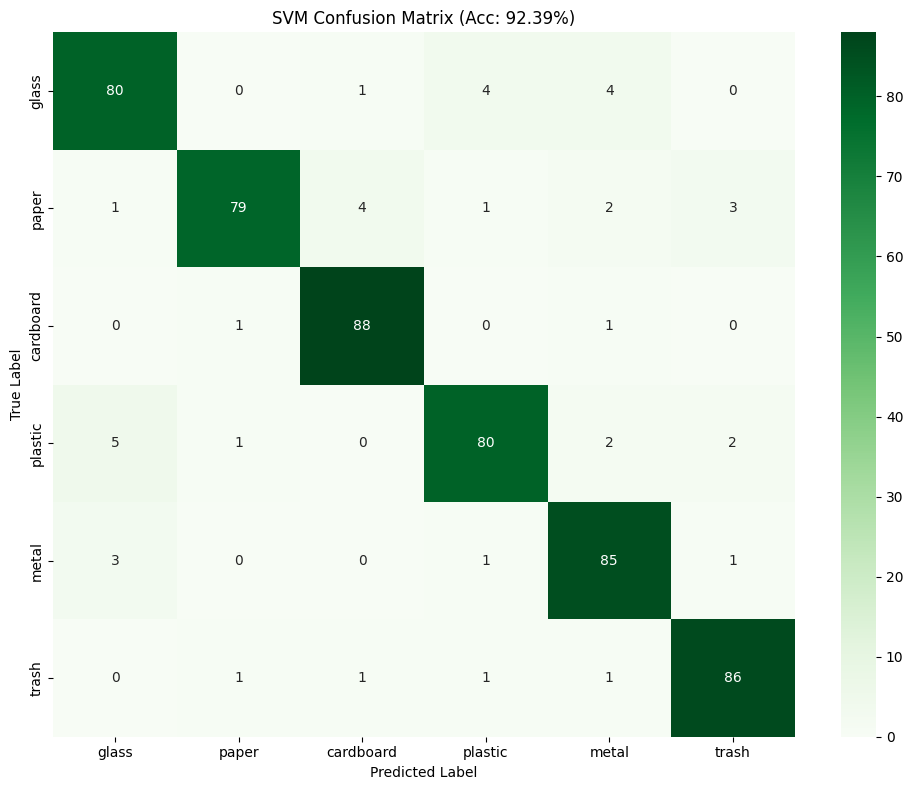

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train SVM with fixed parameters
svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy = svm.score(X_test_scaled, y_test) * 100

print(f"SVM Accuracy: {svm_accuracy:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=actual_class_names, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=actual_class_names,
            yticklabels=actual_class_names)
plt.title(f'SVM Confusion Matrix (Acc: {svm_accuracy:.2f}%)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## Save The Models

## CNN Features

In [10]:
import joblib
from pathlib import Path
from data_preprocessing import CLASS_NAMES
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, '../src')
from feature_extraction import extract_features_from_dataset

MODEL_DIR = Path("../models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

print("="*60)
print("TRAINING AND SAVING ALL MODELS")
print("="*60)

# Save class names (shared by all models)
joblib.dump(CLASS_NAMES, MODEL_DIR / "class_names.pkl")
print("✓ Class names saved\n")

# ============================================================
# 1. CNN FEATURES
# ============================================================
print("-"*60)
print("Processing CNN Features...")
print("-"*60)

# Extract CNN features
cnn_features = extract_features_from_dataset(augmented_images, method='cnn')
print(f"CNN features shape: {cnn_features.shape}")

# Split data
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    cnn_features, augmented_labels, test_size=0.15, random_state=42, stratify=augmented_labels
)

# Scale features
scaler_cnn = StandardScaler()
X_train_cnn_scaled = scaler_cnn.fit_transform(X_train_cnn)
X_test_cnn_scaled = scaler_cnn.transform(X_test_cnn)

# Save CNN scaler
joblib.dump(scaler_cnn, MODEL_DIR / "feature_scaler_cnn.pkl")
print("✓ CNN scaler saved")

# Train and save SVM with CNN
print("\nTraining SVM with CNN features...")
svm_cnn = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_cnn.fit(X_train_cnn_scaled, y_train_cnn)
svm_cnn_acc = svm_cnn.score(X_test_cnn_scaled, y_test_cnn)
joblib.dump(svm_cnn, MODEL_DIR / "svm_classifier_cnn.pkl")
print(f"✓ SVM+CNN saved (Accuracy: {svm_cnn_acc*100:.2f}%)")

# Train and save KNN with CNN
print("\nTraining KNN with CNN features...")
knn_cnn = KNeighborsClassifier(n_neighbors=5)
knn_cnn.fit(X_train_cnn_scaled, y_train_cnn)
knn_cnn_acc = knn_cnn.score(X_test_cnn_scaled, y_test_cnn)
joblib.dump(knn_cnn, MODEL_DIR / "knn_classifier_cnn.pkl")
print(f"✓ KNN+CNN saved (Accuracy: {knn_cnn_acc*100:.2f}%)")

TRAINING AND SAVING ALL MODELS
✓ Class names saved

------------------------------------------------------------
Processing CNN Features...
------------------------------------------------------------

EXTRACTING FEATURES: CNN METHOD
Total images: 2694


Extracting features: 100%|██████████| 2694/2694 [03:43<00:00, 12.05it/s]



Feature extraction complete!
Feature matrix shape: (2694, 1280)
Features per image: 1280

CNN features shape: (2694, 1280)
✓ CNN scaler saved

Training SVM with CNN features...
✓ SVM+CNN saved (Accuracy: 92.59%)

Training KNN with CNN features...
✓ KNN+CNN saved (Accuracy: 85.19%)


## HandCrafted Features

In [ ]:
import joblib
from pathlib import Path
from data_preprocessing import CLASS_NAMES
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, '../src')
from feature_extraction import extract_features_from_dataset
# ============================================================
# 2. HANDCRAFTED FEATURES
# ============================================================
MODEL_DIR = Path("../models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)
print("\n" + "-"*60)
print("Processing Handcrafted Features...")
print("-"*60)

# Extract handcrafted features
handcrafted_features = extract_features_from_dataset(augmented_images, method='combined')
print(f"Handcrafted features shape: {handcrafted_features.shape}")

# Split data
X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(
    handcrafted_features, augmented_labels, test_size=0.2, random_state=42, stratify=augmented_labels
)

# Scale features
scaler_hc = StandardScaler()
X_train_hc_scaled = scaler_hc.fit_transform(X_train_hc)
X_test_hc_scaled = scaler_hc.transform(X_test_hc)

# Save handcrafted scaler
joblib.dump(scaler_hc, MODEL_DIR / "feature_scaler_handcrafted.pkl")
print("✓ Handcrafted scaler saved")

# Train and save SVM with handcrafted
print("\nTraining SVM with handcrafted features...")
svm_hc = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_hc.fit(X_train_hc_scaled, y_train_hc)
svm_hc_acc = svm_hc.score(X_test_hc_scaled, y_test_hc)
joblib.dump(svm_hc, MODEL_DIR / "svm_classifier_handcrafted.pkl")
print(f"✓ SVM+Handcrafted saved (Accuracy: {svm_hc_acc*100:.2f}%)")

# Train and save KNN with handcrafted
print("\nTraining KNN with handcrafted features...")
knn_hc = KNeighborsClassifier(n_neighbors=5)
knn_hc.fit(X_train_hc_scaled, y_train_hc)
knn_hc_acc = knn_hc.score(X_test_hc_scaled, y_test_hc)
joblib.dump(knn_hc, MODEL_DIR / "knn_classifier_handcrafted.pkl")
print(f"✓ KNN+Handcrafted saved (Accuracy: {knn_hc_acc*100:.2f}%)")


In [ ]:
# ============================================================
# SUMMARY
# ============================================================
print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)
print(f"\n{'Model':<25} {'Accuracy':>10}")
print("-"*35)
print(f"{'SVM + CNN':<25} {svm_cnn_acc*100:>9.2f}%")
print(f"{'KNN + CNN':<25} {knn_cnn_acc*100:>9.2f}%")
print(f"{'SVM + Handcrafted':<25} {svm_hc_acc*100:>9.2f}%")
print(f"{'KNN + Handcrafted':<25} {knn_hc_acc*100:>9.2f}%")

print(f"\n✅ All models saved to: {MODEL_DIR.absolute()}")
print("\nSaved files:")
for f in sorted(MODEL_DIR.glob("*.pkl")):
    print(f"  - {f.name}")